# Equipotential Surface

In this notebook, we will plot the equipotential surface of a point charges.


## Libraries

We will use the following libraries:
* [NumPy](http://www.numpy.org/): for numerical calculations
* [Matplotlib](https://matplotlib.org/): for plotting
* [SciPy](https://www.scipy.org/): for numerical integration
* [SymPy](https://www.sympy.org/en/index.html): for symbolic calculations
* [IPython](https://ipython.org/): for interactive computing

## Imports

In [1]:
import numpy as np
from scipy.integrate import odeint
import sympy as sym
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import rcParams

We define the point charges positions and charges.

$$ q_1 = 1 \text{ C} \quad \vec{r}_1 = (1, 0) $$
$$ q_2 = -1 \text{ C} \quad \vec{r}_2 = (-1, 0) $$

We need to compute the equipotential surface of the system. But first, we need to define the potential function.

$$ V(\vec{r}) = \frac{q_1}{|\vec{r} - \vec{r}_1|} + \frac{q_2}{|\vec{r} - \vec{r}_2|} $$

In [7]:
# Create a meshgrid
x = np.linspace(-2, 2, 200)
y = np.linspace(-2, 2, 200)
X, Y = np.meshgrid(x, y)

# Define charges
q1 = 10
q2 = -2

# Define the potential function
def V(x, y):
    return q1/np.sqrt((x-1)**2 + y**2) + q2/np.sqrt((x+1)**2 + y**2)

# Calculate the potential
Z = V(X, Y)

We can plot the equipotential surface using the `contour` function of `matplotlib.pyplot`.

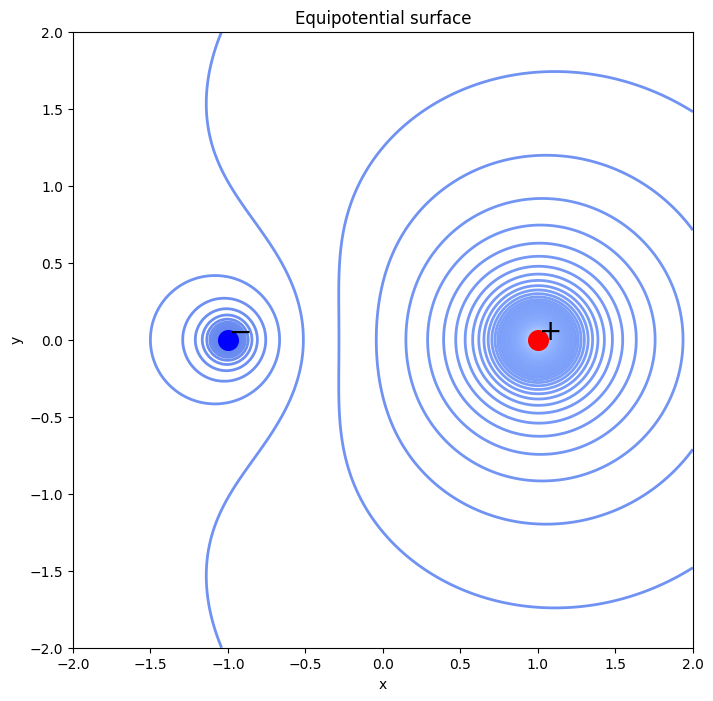

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.contour(X, Y, Z, 500, cmap=cm.coolwarm, linewidths=2, zorder=0)
# Add points for the charges
ax.scatter([-1], [0], c='b', marker='o', s=200)
ax.scatter([1], [0], c='r', marker='o', s=200)
# Charge 1
ax.annotate('$+$', xy=(0.8, 0), xytext=(1, 0), fontsize=20)
# Charge 2
ax.annotate('$-$', xy=(-1.2, 0), xytext=(-1, 0), fontsize=20)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Equipotential surface')
plt.show()

We can try to plot the electric field lines using the `streamplot` function of `matplotlib.pyplot`.

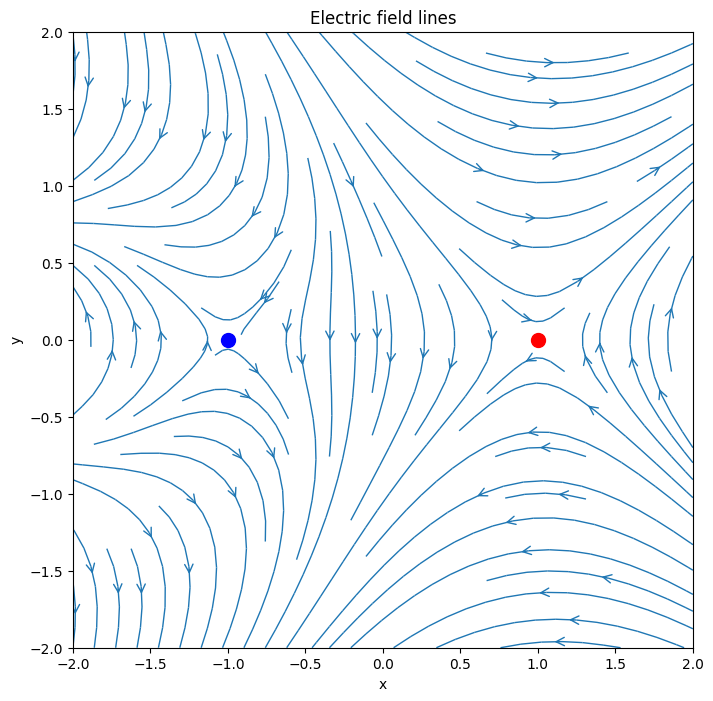

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.streamplot(X, Y, -np.gradient(Z)[0], -np.gradient(Z)[1], density=1, cmap=cm.coolwarm, linewidth=1, zorder=0, arrowstyle='->', arrowsize=1.5)
ax.scatter([-1], [0], c='b', s=100)
ax.scatter([1], [0], c='r', s=100)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Electric field lines')
plt.show()